Warning message in xy.coords(x, y, xlabel, ylabel, log):
"imaginary parts discarded in coercion"


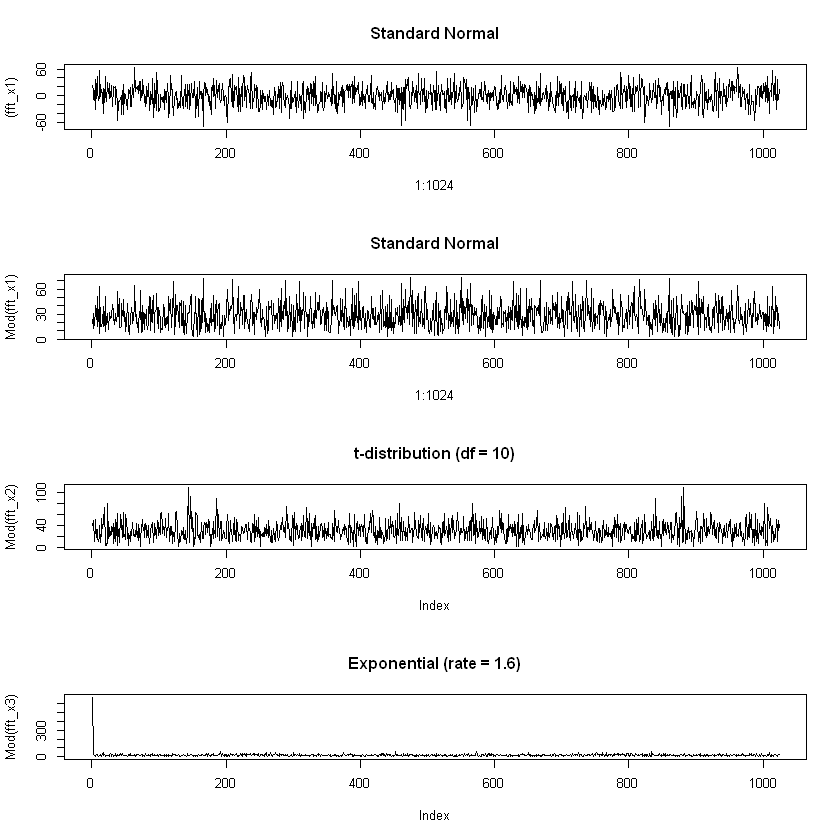

In [44]:
# simulate random variables
set.seed(123)
x1 <- rnorm(1024)
x2 <- rt(1024, df = 10)
x3 <- rexp(1024, rate = 1.6)

# compute FFT
fft_x1 <- fft(x1)
fft_x2 <- fft(x2)
fft_x3 <- fft(x3)

# plot amplitudes
par(mfrow = c(4, 1))
plot(y=(fft_x1),x=1:1024, type = "l", main = "Standard Normal")
plot(y=Mod(fft_x1),x=1:1024, type = "l", main = "Standard Normal")
plot(Mod(fft_x2), type = "l", main = "t-distribution (df = 10)")
plot(Mod(fft_x3), type = "l", main = "Exponential (rate = 1.6)")


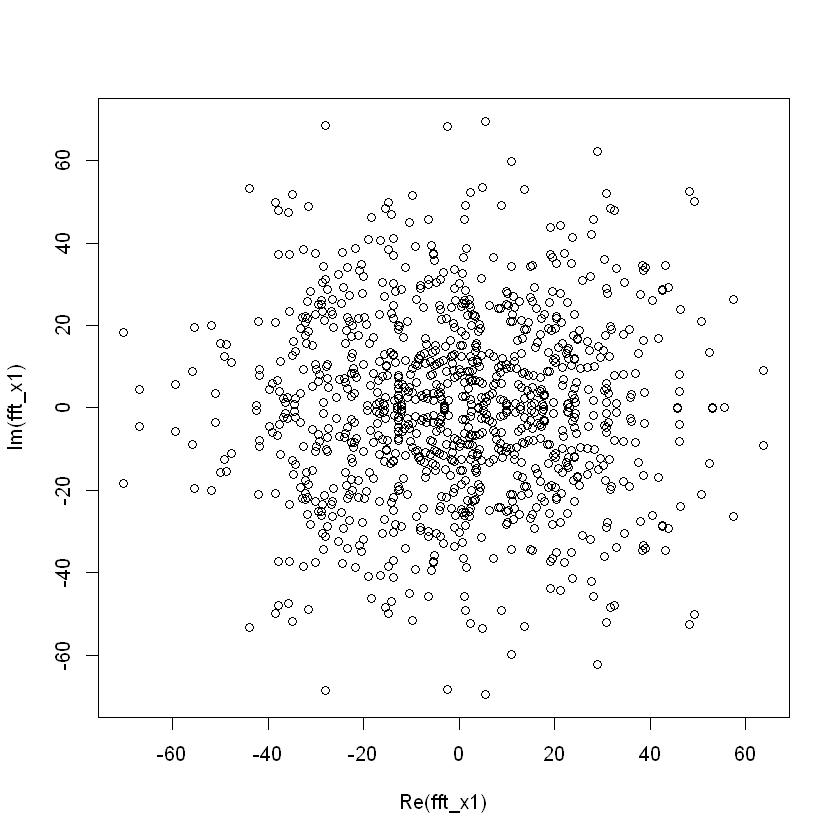

In [43]:
plot(fft_x1)

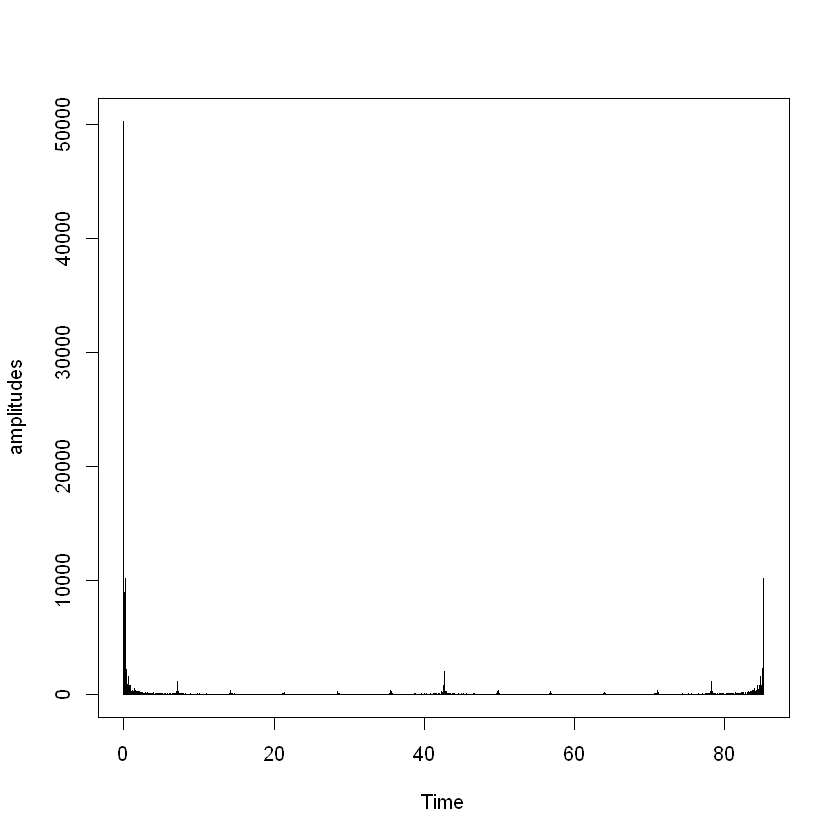

In [1]:
# Load the astsa package
library(astsa)

# Set the seed for reproducibility
set.seed(123)

# Simulate a seasonal time series using the sarima.sim() function from the astsa package

x <- sarima.sim(ar = c(-0.1,0.5),d=1, ma=-.5, D=1, sma=-.6, S=12, n=1024)

# Perform the FFT on the time series
fft_result <- fft(x)

# Extract the amplitudes from the FFT result
amplitudes <- abs(fft_result)

# Plot the amplitudes
plot(amplitudes, type = "h")


In [4]:
install.packages('signal')

package 'signal' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp0ucwZ1\downloaded_packages


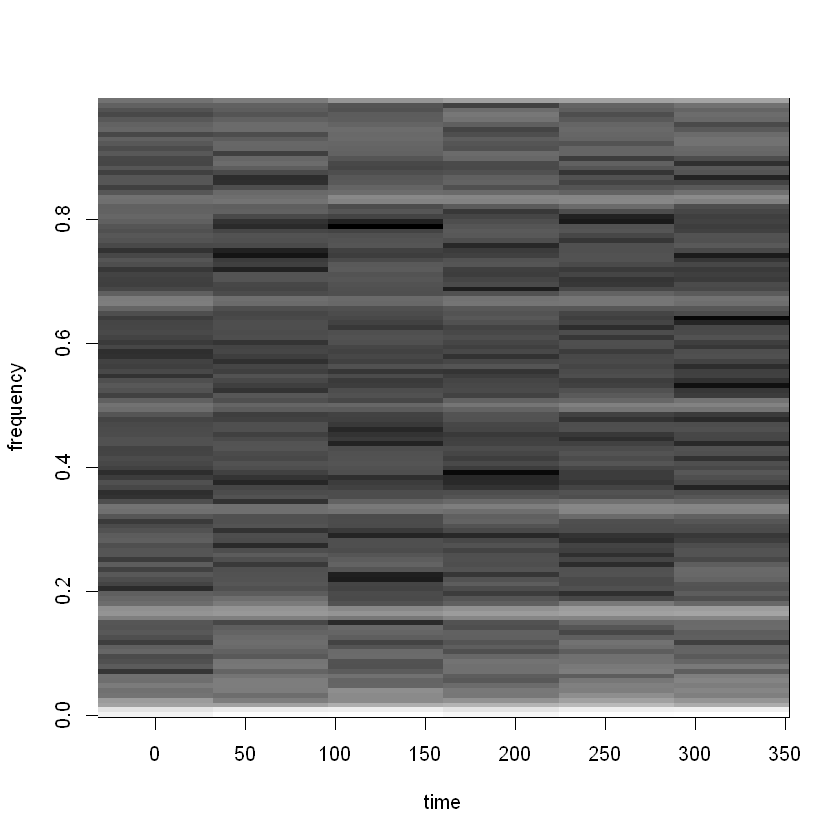

In [13]:
library(signal)

# compute STFT and plot time-frequency contours
specgram(x)

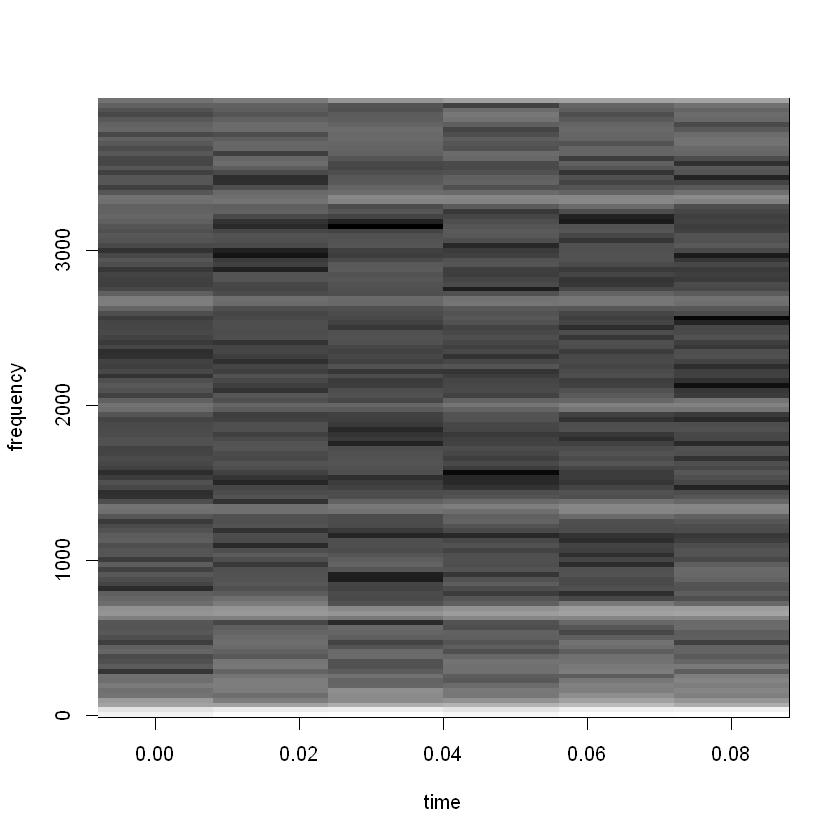

In [14]:
specgram(x, Fs = 8000)

In [7]:
specgram(x, n = min(256, length(x)), Fs = 2, window = hanning(n),
         overlap = ceiling(length(window)/2))

ERROR: Error in hanning(n): object 'n' not found


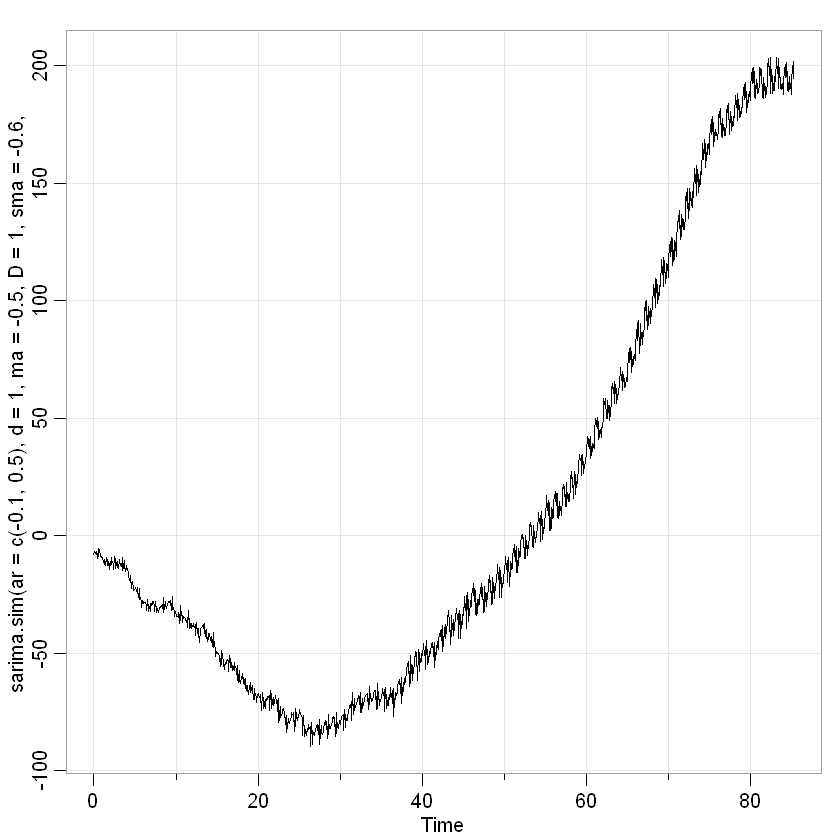

In [2]:
tsplot(sarima.sim(ar = c(-0.1,0.5),d=1, ma=-.5, D=1, sma=-.6, S=12, n=1024))  

In [ ]:
library(forecast)

# simulate time series
set.seed(123)
x <- sarima.sim(order = c(2,1,0), seasonal = c(0,1,1,12), n = 200)

In [28]:
# number of points to use for the fft
nfft=1024

# window size (in points)
window=256

# overlap (in points)
overlap=128

# determine sample rate
fs = 2000

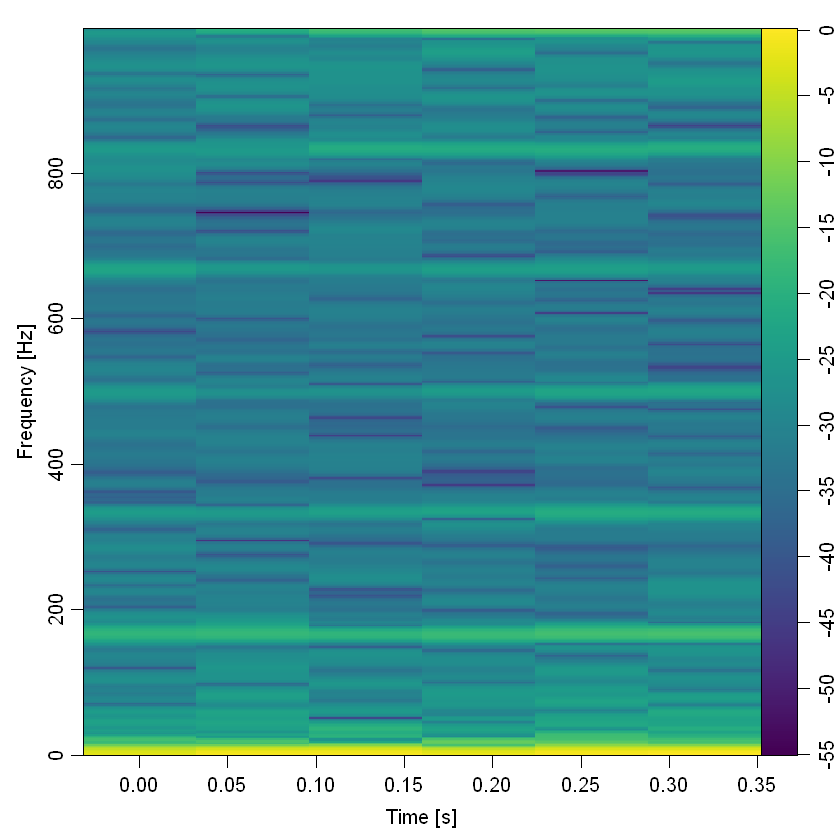

In [29]:
library(signal, warn.conflicts = F, quietly = T) # signal processing functions
library(oce, warn.conflicts = F, quietly = T) # image plotting functions and nice color maps

# create spectrogram
spec = specgram(x, #= snd,
                n = nfft,
                Fs = fs,
                window = window,
                overlap = overlap
)

# discard phase information
P = abs(spec$S)

# normalize
P = P/max(P)

# convert to dB
P = 10*log10(P)

# config time axis
t = spec$t

# plot spectrogram
imagep(x = t,
       y = spec$f,
       z = t(P),
       col = oce.colorsViridis,
       ylab = 'Frequency [Hz]',
       xlab = 'Time [s]',
       drawPalette = T,
       decimate = F
)

In [31]:
plot(y=fft(x), x = time, type = "l")

ERROR: Error in seq.default(from, to, length.out = n): 'from' must be of length 1


In [32]:
x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-13.0634662,-13.8553504,-11.5491185,-12.0362334,-9.0327504,-12.1785917,-12.2942782,-11.3342398,-13.9174900,-14.1136715,-13.3649369,-15.4742806
1,-16.1670673,-16.2391656,-14.7393259,-15.2481580,-13.2166717,-15.9298280,-14.5068828,-15.3232337,-15.7902618,-15.9552672,-15.0865227,-17.2572664
2,-15.9251359,-16.2863234,-13.5557453,-14.4127884,-12.7078227,-13.5498469,-14.2556850,-11.1105238,-12.8643658,-12.4805082,-13.1506848,-14.7641877
3,-14.4322189,-15.0413635,-13.0412543,-14.7057963,-12.4061704,-15.4785639,-16.1711732,-15.1812528,-15.8672129,-17.1014058,-15.6350562,-20.0747841
4,-18.0058025,-19.4294925,-16.3034546,-18.0660543,-16.1456713,-19.3010864,-20.0089978,-18.7015936,-21.0987169,-21.3989646,-21.4297873,-22.1277984
5,-23.2074831,-22.2123994,-20.9671743,-22.3062027,-20.5428366,-21.6729486,-22.5731041,-20.7961697,-23.1757027,-25.0748510,-22.7725395,-27.7127679
6,-24.7870677,-25.1113182,-24.1060728,-24.0565371,-23.4108791,-26.0641066,-27.9369373,-27.5577840,-29.7481470,-32.4562059,-29.8544002,-32.2570976
7,-32.6546489,-30.8700326,-29.9230598,-29.7198205,-29.9252932,-31.1671929,-33.3902335,-31.0606867,-34.4370444,-34.1703330,-34.1733460,-34.6418647
8,-36.7085251,-35.3842277,-31.5797636,-33.8984194,-31.2116138,-33.7470744,-35.0642838,-33.1352606,-35.5157567,-36.6466716,-35.3211674,-37.4320659
9,-35.5794245,-36.8324692,-33.8586188,-35.5746712,-33.3758401,-35.5723919,-37.3628673,-36.5064579,-37.2877975,-39.8562603,-38.3819007,-40.9899535
